In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [142]:
#Data loading 
df=pd.read_csv("apple_price.csv")
df.head()

,date,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,target
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,234684800,44.149614,50.996175,-105.071637,-42.411877,19.282236,19.265060,18.372604,18.484713,0.194637,19.979268,0.321428,0.305722,0.316301,bearish
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,392467600,33.094332,43.883529,-152.150999,-124.511983,19.297314,19.267243,18.398896,18.501371,0.132887,19.936375,0.473929,0.329752,0.327561,bullish
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,412610800,37.525661,45.858019,-132.306490,-130.122350,19.310864,19.273472,18.418311,18.519794,0.091398,19.893571,0.471428,0.349991,0.337837,bearish
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,317209200,34.055624,43.675708,-89.587009,-108.089019,19.316671,19.274008,18.433146,18.535080,0.046768,19.857893,0.287141,0.341013,0.334216,bullish
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,258529600,39.768497,46.104107,-58.525539,-82.150032,19.329171,19.279313,18.449414,18.552493,0.021012,19.816875,0.245355,0.327347,0.327868,bearish


In [143]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       2516 non-null   object 
 1   open       2516 non-null   float64
 2   high       2516 non-null   float64
 3   low        2516 non-null   float64
 4   close      2516 non-null   float64
 5   volume     2516 non-null   int64  
 6   rsi_7      2516 non-null   float64
 7   rsi_14     2516 non-null   float64
 8   cci_7      2516 non-null   float64
 9   cci_14     2516 non-null   float64
 10  sma_50     2516 non-null   float64
 11  ema_50     2516 non-null   float64
 12  sma_100    2516 non-null   float64
 13  ema_100    2516 non-null   float64
 14  macd       2516 non-null   float64
 15  bollinger  2516 non-null   float64
 16  TrueRange  2516 non-null   float64
 17  atr_7      2516 non-null   float64
 18  atr_14     2516 non-null   float64
 19  target     2516 non-null   object 
dtypes: float

In [144]:
#data description 
df.describe()

,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14
count,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000
mean,77.856671,78.704468,77.060193,77.920721,1.366662e+08,55.829312,55.519634,18.095222,25.615576,76.247802,76.268259,74.643895,74.650532,0.477411,77.261412,1.819842,1.814850,1.808171
std,56.171865,56.808974,55.581734,56.226768,8.403551e+07,17.720405,12.917822,99.975348,108.636294,55.164687,55.126114,54.292014,54.142049,1.820108,55.795529,1.829370,1.557822,1.520721
min,17.684999,17.911785,17.626785,17.849285,2.404830e+07,7.771611,21.024935,-233.333333,-359.820078,18.865621,18.936409,18.372604,18.484713,-6.673117,18.645339,0.115000,0.208006,0.241328
25%,29.740001,29.976250,29.554375,29.803750,8.138358e+07,42.223776,45.982864,-67.510511,-62.798902,29.016362,29.150426,29.313956,29.263913,-0.208277,29.462344,0.481874,0.558372,0.571540
50%,47.963749,48.534999,47.743749,48.107500,1.121606e+08,56.567948,55.840878,35.924386,45.301983,48.321325,47.546591,46.741750,46.984332,0.344944,47.652813,1.025000,1.012167,1.020535
75%,134.792496,135.995002,133.325004,134.562497,1.668892e+08,70.072551,64.891153,99.248997,108.764720,131.678000,131.059003,129.198700,128.011330,1.180283,133.377500,2.732506,3.002147,3.021852
max,198.020004,199.619995,197.000000,198.110001,1.065523e+09,94.046150,90.402170,233.333333,368.904964,187.442600,188.942738,182.538301,184.681801,7.511570,194.308501,12.809998,7.034749,5.984262


In [145]:
X=df[['open','high','low']]
y=df['close']

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [147]:
model=LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [148]:
y_test

765      30.000000
950      38.974998
89       21.172501
1909    147.360001
1450     56.764999
           ...    
2081    172.139999
2436    177.559998
1971    149.800003
2221    144.800003
1493     67.677498
Name: close, Length: 504, dtype: float64

In [149]:
pred=model.predict(X_test)
pred[:20]

array([ 29.96675295,  39.23406443,  21.17490133, 147.17127809,
        57.2546605 ,  53.2459194 ,  24.44676288, 184.98203315,
        43.49375119,  24.14214287, 175.68200844, 104.09163844,
        25.07497842, 175.26804389,  40.79813346,  44.88634029,
       133.35744672,  23.06803329,  18.09418258, 188.67293599])

In [150]:
MSE= mean_squared_error(y_test, pred)
print("MSE :", mean_squared_error(y_test, pred))
print("MAE :", mean_absolute_error(y_test, pred))
print("R2 :", r2_score(y_test, pred))
print("RMSE :", np.sqrt(MSE))

MSE : 0.40129067754273806
MAE : 0.3590694092330568
R2 : 0.9998682687140961
RMSE : 0.6334750804433731


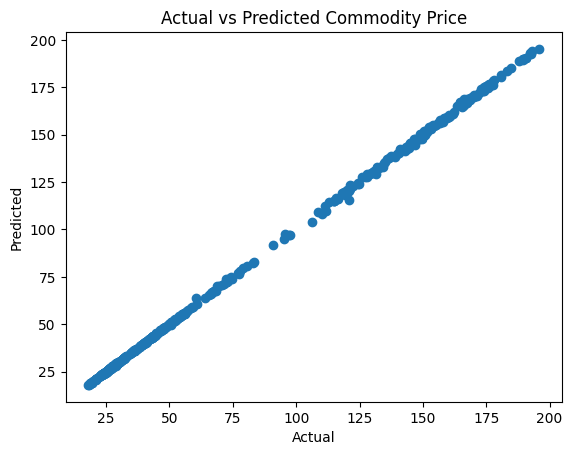

In [151]:
plt.scatter(y_test, pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Commodity Price")
plt.show()

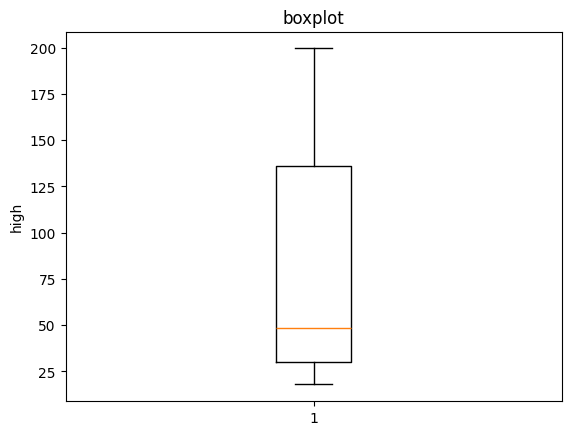

In [152]:
plt.boxplot(df["high"])
plt.title("boxplot")
plt.ylabel("high")
plt.show()

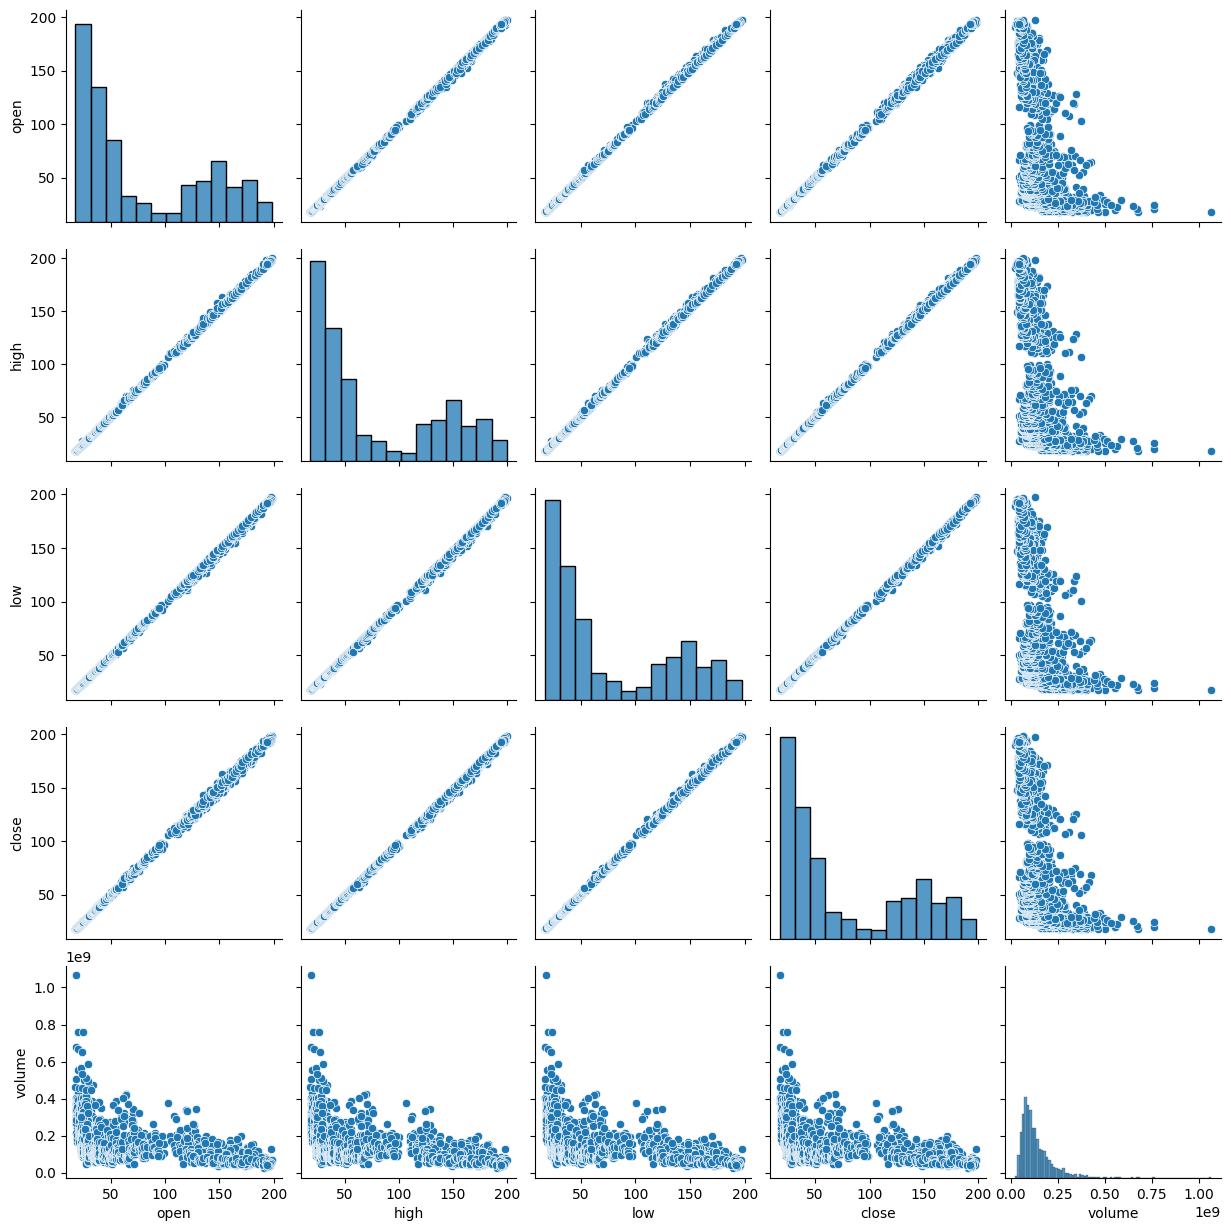

In [153]:
#pairplot
sns.pairplot(df.iloc[:, :6])
plt.show()

In [154]:
print(df.shape)

(2516, 20)


In [155]:
df.dropna(inplace=True)

In [156]:
df.isnull().sum()

date         0
open         0
high         0
low          0
close        0
volume       0
rsi_7        0
rsi_14       0
cci_7        0
cci_14       0
sma_50       0
ema_50       0
sma_100      0
ema_100      0
macd         0
bollinger    0
TrueRange    0
atr_7        0
atr_14       0
target       0
dtype: int64

In [157]:
New_data = pd.DataFrame({
    'open':[110.1],
    'high':[200.1],
    'low':[100.1]})

In [158]:
pred=model.predict(New_data)
print(pred)

[175.00536963]
